# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 9 - Intro Regresión Lineal**
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).  
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:  
- Deberéis separar la X y la y.  
- Deberéis crear el train y el test.  
- Ajustar vuestro modelo.  

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,country,region,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
0,Argentina,SouthAmerica,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
1,Australia,Oceania,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


In [3]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'country', 'region'], axis = 1)
y = df["restaurant_price_index_normal"]

In [4]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# iniciamos la regresión lineal
lr = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
# usamos el método predict() para hacer las predicciones
y_predict_train = lr.predict(x_train) # predicciones para los datos de entrenamiento
y_predict_test = lr.predict(x_test) # predicciones para los datos de test

In [7]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
# unimos todo en un dataframe
df_resultados = pd.concat([df_train,df_test], axis = 0)
df_resultados.head()

,Real,Predicted,Set
34,3.232599,3.401407,Train
25,3.200753,3.320231,Train
3,3.906126,3.563881,Train
17,3.100294,2.970003,Train
40,3.176574,3.140247,Train


In [8]:
# creamos una columna con los errores/residuos
df_resultados['residuos'] = df_resultados['Real'] - df_resultados['Predicted']
df_resultados.head()

,Real,Predicted,Set,residuos
34,3.232599,3.401407,Train,-0.168808
25,3.200753,3.320231,Train,-0.119478
3,3.906126,3.563881,Train,0.342245
17,3.100294,2.970003,Train,0.130290
40,3.176574,3.140247,Train,0.036327


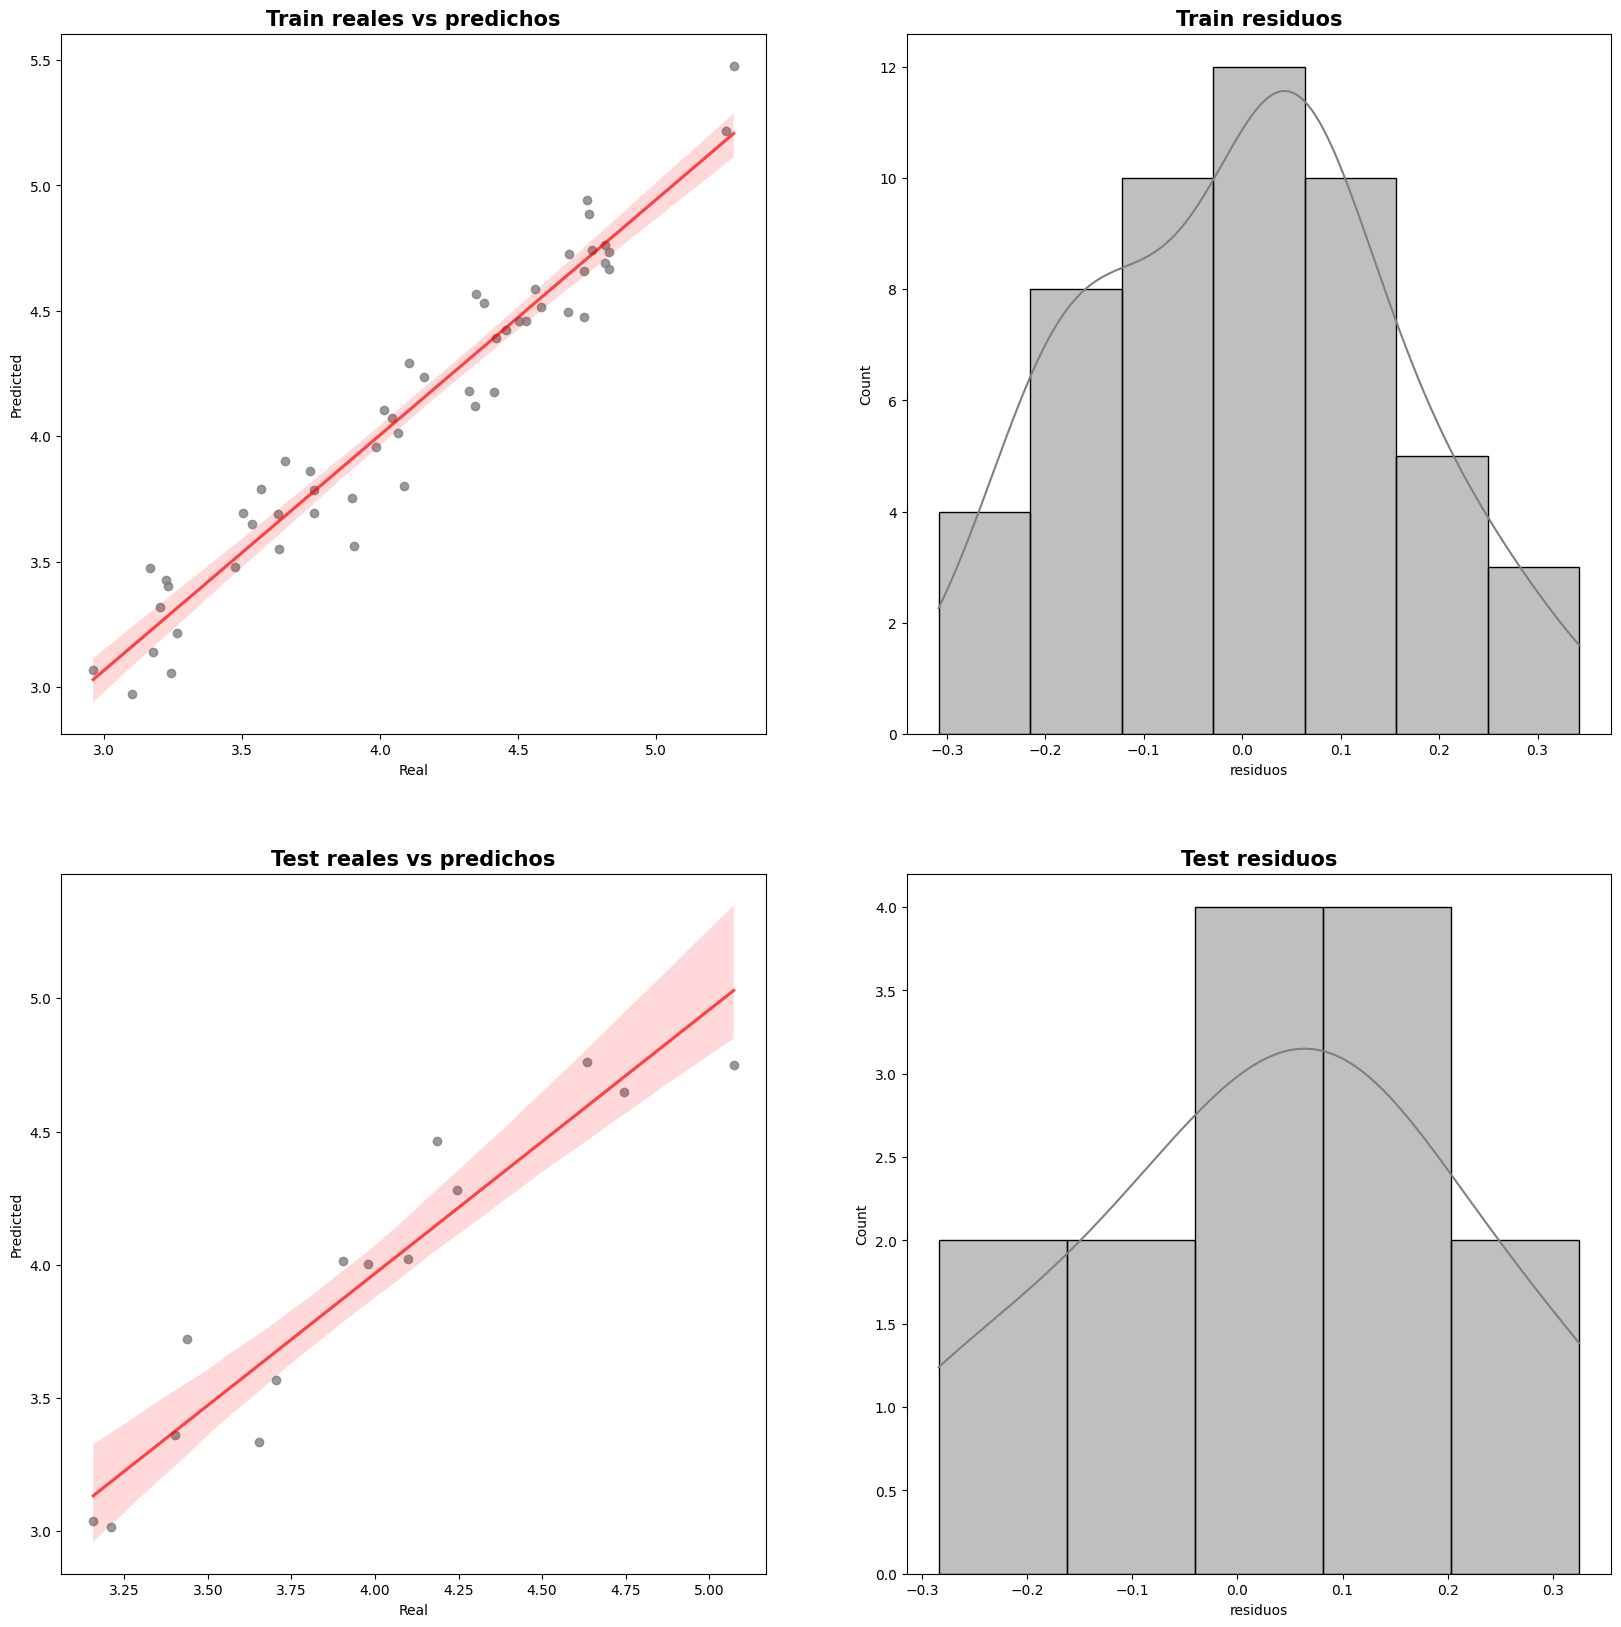

In [9]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados[df_resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })

sns.regplot(data = df_resultados[df_resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados[df_resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados[df_resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [10]:
# Validación cruzada para R2 y RMSE
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X, # conjunto de datos de las predictoras completo (sin dividir en train/test)
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Convertimos el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.014398,0.003177,0.851160,-0.183016
1,0.003523,0.008741,0.616362,-0.236370
2,0.004129,0.002917,0.777638,-0.305009
3,0.015218,0.003051,0.929831,-0.167819
4,0.013025,0.002930,0.802703,-0.220470
5,0.013897,0.004168,0.968428,-0.141155
6,0.005284,0.001994,0.088599,-0.329730
7,0.002703,0.003284,0.808506,-0.133281
8,0.005247,0.003623,0.899438,-0.266069
9,0.016897,0.004391,0.878882,-0.227322


In [11]:
# calculamos la media para cada una de las métricas
print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.76
la media para el RMSE es 0.22


Conclusiones:

- El 76% de la variación de la VR se explica por las VPs (R2 = 0.76) y la media del RMSE es baja (0.22). Así que los datos sugieren que nuestro modelo de ML se ajusta lo sufuciente a los datos reales. 


- La mayoría de las iteraciones que hace el cross validation nos dá buenos resultados tanto de R2 como de RMSE, aunque los valores medios se veen modificados por la séptima iteración, lo que puede estar explicado por la presencia de outliers (aúnque se realizó su gestión con el método RobustScaler).

In [12]:
df_resultados.to_csv("datos/soci_econ_country_profiles_resultados.csv")
cv_scores.to_csv("datos/soci_econ_country_profiles_cv_scores.csv")